In [4]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

## Q1. Para a rede social Hamsterster, calcule a média dos menores caminhos e o diâmetro. Considere apenas o maior componente.

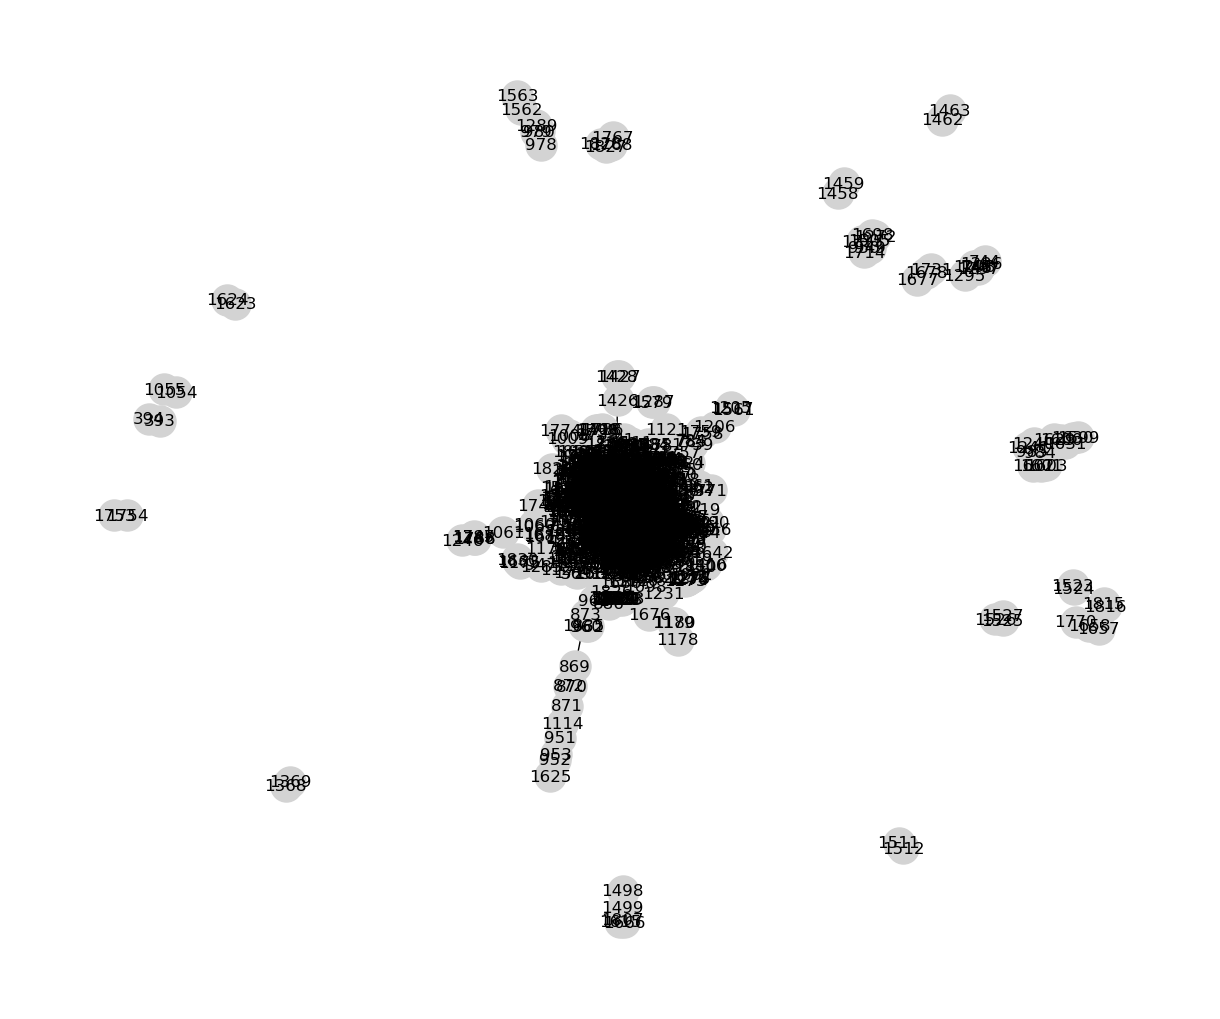

In [7]:
G= nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2Q/hamsterster.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [9]:
if not nx.is_connected(G):
    components = list(nx.connected_components(G))
    
    largest_component = max(components, key=len)
    
    largest_subgraph = G.subgraph(largest_component).copy()

    print("Average shortest path:", nx.average_shortest_path_length(largest_subgraph))
    print("Netwok diameter from the largest componet:", nx.diameter(largest_subgraph))

Average shortest path: 3.452640184078649
Netwok diameter from the largest componet: 14


## Q2. Para a rede de aeroportos (base USairport500), calcule a média e variância do comprimento dos menores caminhos. Considere apenas o maior componente na rede.

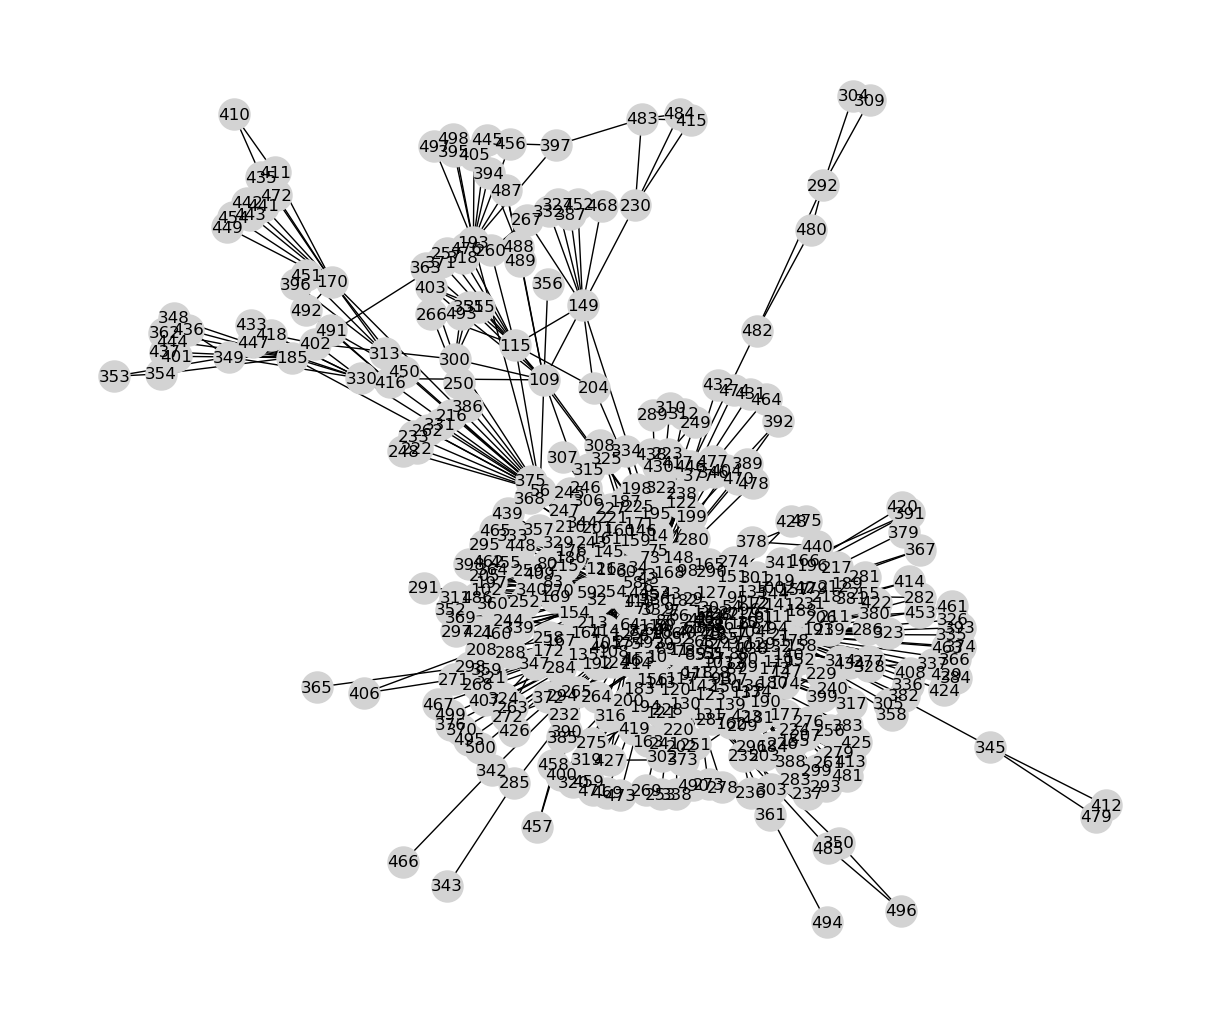

In [15]:
G= nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2Q/USairport500.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [17]:
nx.is_connected(G)

True

In [19]:
print("Average shortest path:", nx.average_shortest_path_length(G))

Average shortest path: 2.9910300601202406


In [38]:
path_lengths = []

for nodes in G.nodes:
    lengths = nx.shortest_path_length(G, nodes)
    path_lengths.extend(lengths.values())

variance = np.var(path_lengths)
print("Variance of shortest path lengths:", variance)

Variance of shortest path lengths: 0.8337684376959998


## Q3. Calcule o coeficiente de assortatividade para a rede Advogato. Considere apenas o maior componente. Considere o valor mais próximo.

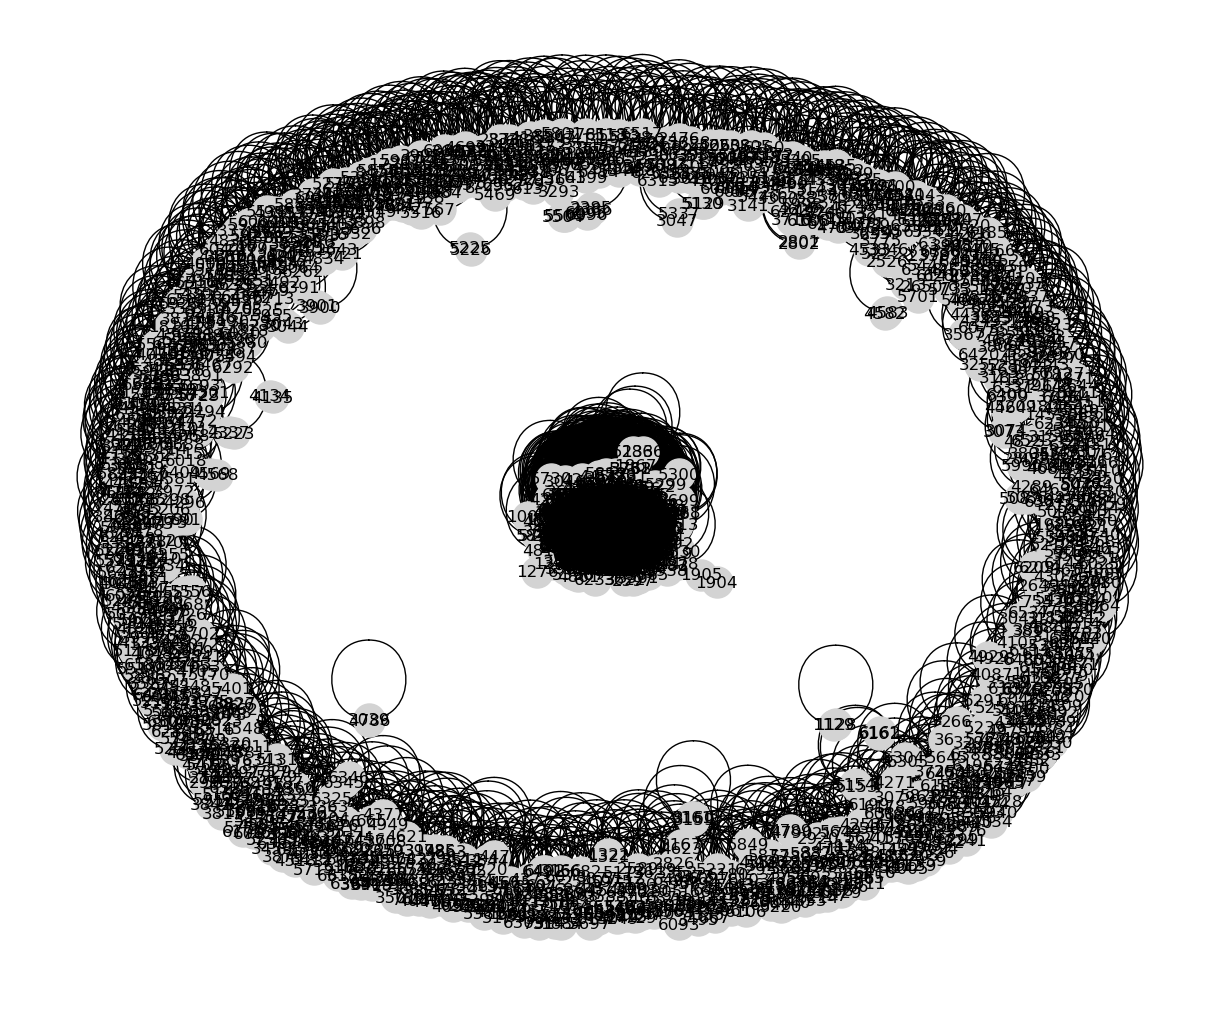

In [6]:
G= nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2Q/advogato.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [43]:
nx.is_connected(G)

False

In [8]:
if not nx.is_connected(G):
    components = list(nx.connected_components(G))
    
    largest_component = max(components, key=len)
    
    largest_subgraph = G.subgraph(largest_component).copy()

In [10]:
r=nx.degree_assortativity_coefficient(largest_subgraph)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.0846


## Q4. Para a rede de aeroportos (USairport500), calcule a entropia de Shannon considerando o comprimento dos menores caminhos. Use o logaritmo na base 2 e considere apenas o maior componente.

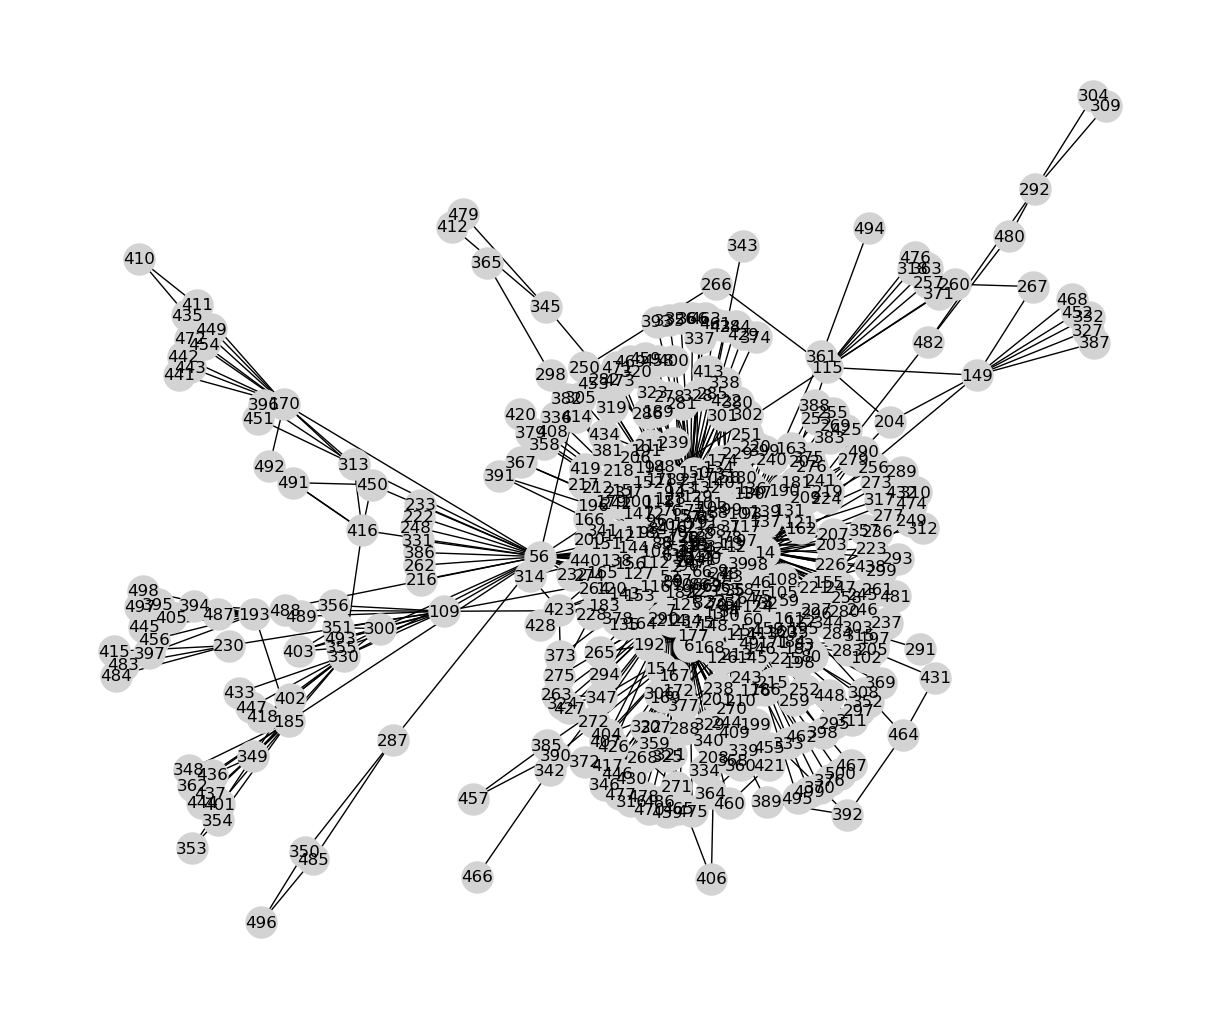

In [12]:
G= nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2Q/USairport500.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [24]:
nx.is_connected(G)

True

In [26]:
def shortest_path_distribution(G):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    path_lengths = []
    
    for node in shortest_paths:
        for target, length in shortest_paths[node].items():
            if node != target:  
                path_lengths.append(length)
    
    path_lengths = np.array(path_lengths)
    max_length = np.max(path_lengths)
    distribution = np.zeros(max_length + 1)
    
    for length in path_lengths:
        distribution[length] += 1
    
    distribution = distribution / np.sum(distribution)  
    return np.arange(0, max_length + 1), distribution

def shannon_entropy(G):
    _, Pk = shortest_path_distribution(G)
    H = -np.sum([p * math.log2(p) for p in Pk if p > 0])
    return H

In [28]:
print('Shannon entropy:', shannon_entropy(G))

Shannon entropy: 1.883667007854659


## Q5. Calcule o coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau para a rede de palavras (word_adjacencies). Considere apenas o maior componente conectado.

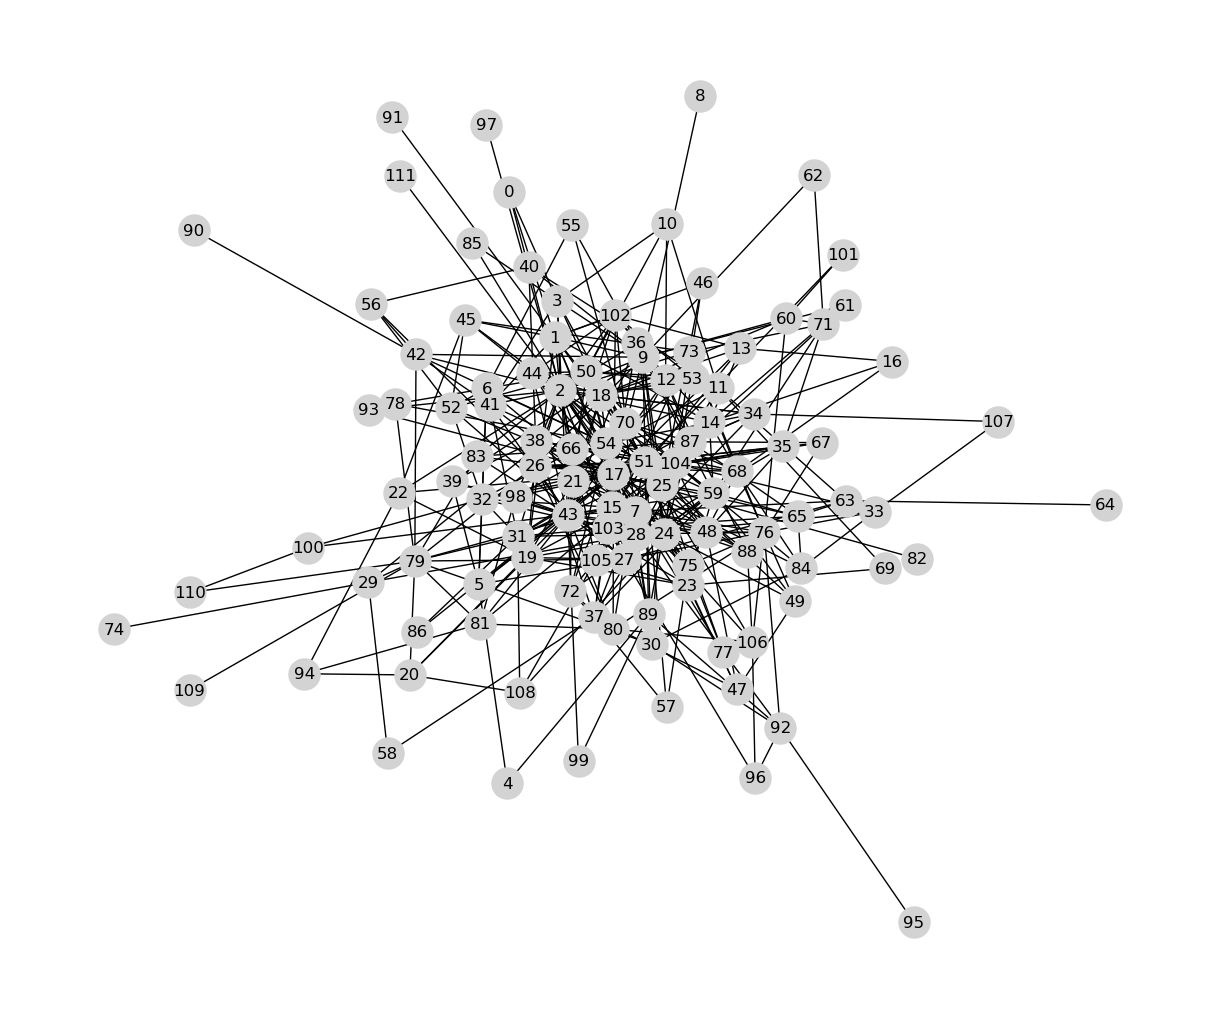

In [30]:
G= nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2Q/word_adjacencies.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [32]:
nx.is_connected(G)

True

In [34]:
knn = []
for i in G.nodes():
    aux =  nx.average_neighbor_degree(G, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 14.76


In [36]:
vk = dict(G.degree())
vk = list(vk.values())
print(vk)

[3, 14, 33, 9, 17, 12, 49, 14, 9, 13, 8, 6, 3, 28, 1, 10, 7, 10, 5, 8, 15, 14, 11, 15, 12, 7, 7, 7, 15, 13, 7, 7, 5, 2, 1, 5, 21, 7, 1, 4, 28, 2, 2, 7, 7, 6, 10, 5, 11, 7, 3, 12, 10, 9, 12, 10, 10, 6, 1, 10, 4, 13, 5, 2, 2, 5, 2, 6, 6, 3, 12, 6, 10, 12, 13, 6, 7, 6, 4, 7, 3, 8, 1, 6, 2, 9, 5, 6, 5, 3, 4, 5, 5, 6, 4, 3, 5, 6, 2, 1, 3, 2, 3, 1, 6, 2, 3, 2, 1, 1, 2, 1]


AttributeError: 'Text' object has no property 'Fontsize'

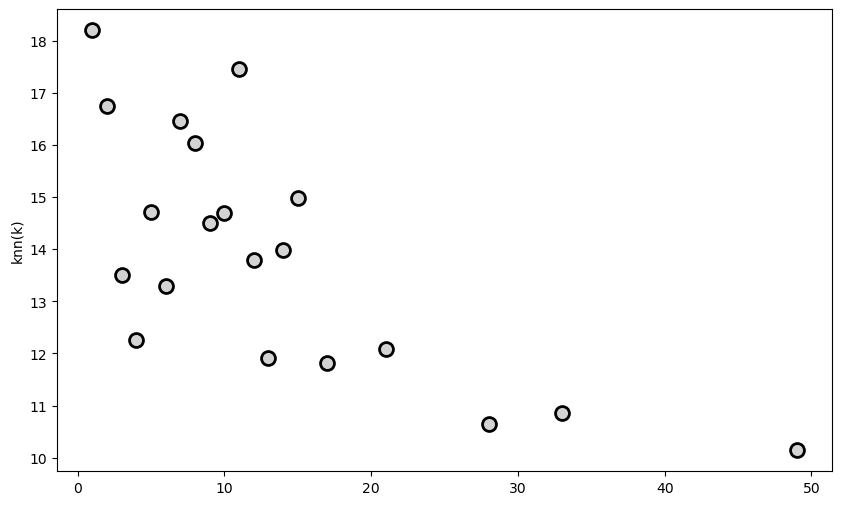

In [38]:
knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
fig= plt.figure(figsize=(10,6))

plt.plot(ks, knnk, '-o', color='gray',markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)", Fontsize = 20)
plt.xlabel("k", Fontsize = 20)
#plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

In [40]:
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)


Pearson correlation coefficient: -0.710832214935246
